# IPython library is used to clear console.

In [ ]:
from IPython.display import clear_output 

# Mounting the google drive.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Changing directory to /content/gdrive/MyDrive/ML/yolov4/darknet

Make sure you have required files and folders in your google drive(current directory).

In [ ]:
%cd ../content/gdrive/MyDrive/ML/yolov4/darknet

/content/gdrive/MyDrive/ML/yolov4/darknet


# Configuring and executing make command for NumberPlate Detection yolov4 model.

In [ ]:
import os
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile
os.system("make")

0

# Changing current directory to ../../digitTrainer/darknet.

# Configuring and executing make command for Digit Detection yolov4 model.

In [ ]:
%cd ../../digitTrainer/darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile
os.system("make")
%cd ../../yolov4/darknet

/content/gdrive/MyDrive/ML/digitTrainer/darknet
/content/gdrive/MyDrive/ML/yolov4/darknet


# Declaring a list variable for further usage in displaying output.

In [ ]:
Results = []

# Configuring configration file.

In [ ]:
%cd cfg
os.system("sed -i 's/batch=64/batch=1/' yolov4-obj.cfg")
os.system("'s/subdivisions=16/subdivisions=1/' yolov4-obj.cfg")
%cd ..

/content/gdrive/MyDrive/ML/yolov4/darknet/cfg
/content/gdrive/MyDrive/ML/yolov4/darknet


# Creating functions to display output.

PrintBundingBoxAndSave function creates bounding box on number plate and digit, display the image and save it into the output directory.

PrintImg function shows normal image without any processing.

ShowImage will crop the image.

In [ ]:
from PIL import Image
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

def PrintBundingBoxAndSave(name, output, l, t, w, h, digits):
  img = cv2.imread(name)
  cv2.rectangle(img, (l,t), (l+w, t+h), (0, 0, 255), 2)
  font = cv2.FONT_HERSHEY_SIMPLEX
  cv2.putText(img, output, (l+w + 5, t+h), font, 0.8, (0, 0, 255), 1, cv2.LINE_AA)
  for digit in digits:
    cv2.rectangle(img, (digit[2],digit[3]), (digit[2]+digit[4], digit[3]+digit[5]), (255, 255, 0), 1)
  cv2_imshow(img)
  cv2.imwrite('Output/' + name, img)
  print("You can download available file from Output/"+name)      




def PrintImg(name):
  img = cv2.imread(name)
  cv2_imshow(img)

def ShowImage(name, l, t, w, h):
  img = cv2.imread(name)
  crop = img[t:t+h, l:l+w]
  cv2_imshow(crop)


# Displaying the present files.


In [ ]:
!ls ../

backup	 generate_test.py   obj.data   obj.zip	test.zip
darknet  generate_train.py  obj.names  Testing	yolov4-obj.cfg


# It will process the text file to fetch the required cordinates.

In [ ]:
def FindCordinates(reqFile):
  file = open(reqFile, "r")
  Text =  file.read()

  Lines = Text.split("\n")

  lastlbl = ""
  Percentage = 0
  expCords = []
  AllExp = []

  notedown = False
  for line in Lines:
    if "Predicted in" in line:
      notedown = True
    elif notedown:
        reqText = line
        procText = reqText.replace("left_x:", ";").replace("top_y:", ";").replace("width:", ";").replace("height:", ";").replace("(", "").replace(")", "").replace("%", "").replace(": ", ";").replace(" ", "")
        cords  = procText.split(";")
        if len(cords) == 6:
          tPer = int(cords[1])
          if lastlbl != cords[0]:
            Percentage = 0

          if Percentage < tPer:
            if lastlbl == cords[0]:
              AllExp.pop(len(AllExp) - 1)
            lastlbl = cords[0]
            Percentage = tPer
            expCords = [cords[0], int(cords[1]),int(cords[2]),int(cords[3]),int(cords[4]),int(cords[5])]
            AllExp.append(expCords)
  return AllExp


# It will run the yolov4 Digit Detection model to find the cordinates of all the digits in an input image.

In [ ]:
def DetectDigits(name):
  %cd ../../digitTrainer/darknet
  os.system("./darknet detector test data/obj.data cfg/yolov4-obj.cfg ../digitbackup/yolov4-obj_last.weights -ext_output ../../yolov4/Testing/"+ name +" -thresh 0.3  > ../../yolov4/Testing/Plate.txt")
  %cd ../../yolov4/Testing
  Digits = FindCordinates("./Plate.txt")

  return Digits


# It will run the yolov4 Number Plate Detection model to find the cordinates of the Number Plate present in an input image.

In [ ]:
def DetectNumberPlate(name):
  %cd ../darknet
  nm = name.split(".")[0]
  os.system("./darknet detector test data/obj.data cfg/yolov4-obj.cfg ../backup/yolov4-obj_last.weights -ext_output ../Testing/" + name + " -thresh 0.3  > ../Testing/"+ nm +".txt")
  %cd ../Testing
  os.system("cd ../Testing")
  
  ReqCords = FindCordinates("./"+ nm +".txt")
  
  return ReqCords

  

# Display() function is used for displaying all the output images.

In [ ]:
def Display():
  for res in Results:
    name, output, ReqCords, Digits = res

    PrintImg(name)
    print(output)
    print("\n")

    for req in ReqCords:
      PrintBundingBoxAndSave(name, output, req[2], req[3], req[4], req[5], Digits)
      ShowImage(name, req[2], req[3], req[4], req[5])
    print("\n")

    for digit in Digits:
      ShowImage(name, digit[2], digit[3], digit[4], digit[5])
      print("\n")


    print("\n--------------------------------------------------------------------------------\n")


# This function will take an input image and process it to find number plate and digits on it and further process to display it to the user.

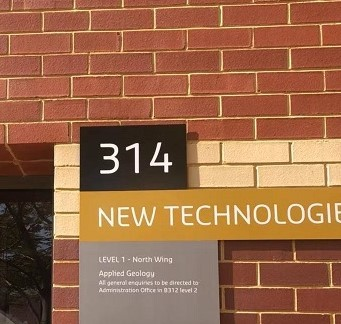

314




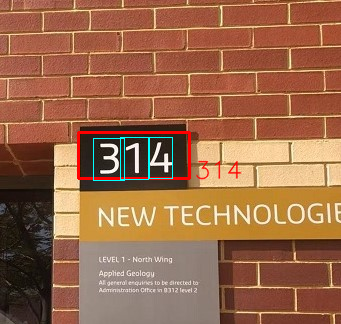

You can download available file from Output/test02.jpg


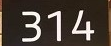




--------------------------------------------------------------------------------



In [22]:
!ls ../Testing
%cd ../Testing
def upload():
  from google.colab import files
  uploaded = files.upload() 
  Results.clear()
  
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
    ReqCords = DetectNumberPlate(name)
    Digits = DetectDigits(name)

    output = ""
    for digit in Digits:
      output += str(digit[0])

    print(ReqCords)
    print(Digits)
    Results.append([name, output, ReqCords, Digits])
  

upload()
clear_output()
Display()